In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
class Net(torch.nn.Module):
    def __init__(self,n_features, n_hidden, n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_features,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)
    
    def forward(self,x):
        x = F.relu(self.hidden(x))
        return self.predict(x)

In [27]:
n_data = torch.ones(100,2)

In [28]:
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100)

In [30]:
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)

In [43]:
x = torch.cat((x0,x1),0).type(torch.FloatTensor)

In [47]:
y = torch.cat((y0,y1),).type(torch.LongTensor)  #y只能在0维度上合并，所以可以省略不写

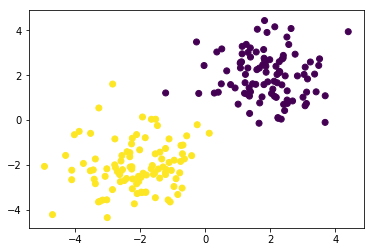

In [53]:
plt.scatter(x.numpy()[:,0],x.numpy()[:,1],c = y.numpy())

In [60]:
net = Net(2,10,2)
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.5)

In [61]:
for i in range(100):
    y_ = net(x)
    loss = loss_func(y_, y)  #y中的数字表示取y_每个样本的哪一维，比如说y[0] = 2,那么就是算-log(softmax(y_[0])[2])，这就表示第0号样本的损失值
    print(i,'th loss is ', loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

0 th loss is  tensor(0.6081, grad_fn=<NllLossBackward>)
1 th loss is  tensor(0.3670, grad_fn=<NllLossBackward>)
2 th loss is  tensor(0.2556, grad_fn=<NllLossBackward>)
3 th loss is  tensor(0.1761, grad_fn=<NllLossBackward>)
4 th loss is  tensor(0.1252, grad_fn=<NllLossBackward>)
5 th loss is  tensor(0.0949, grad_fn=<NllLossBackward>)
6 th loss is  tensor(0.0764, grad_fn=<NllLossBackward>)
7 th loss is  tensor(0.0642, grad_fn=<NllLossBackward>)
8 th loss is  tensor(0.0556, grad_fn=<NllLossBackward>)
9 th loss is  tensor(0.0493, grad_fn=<NllLossBackward>)
10 th loss is  tensor(0.0444, grad_fn=<NllLossBackward>)
11 th loss is  tensor(0.0406, grad_fn=<NllLossBackward>)
12 th loss is  tensor(0.0375, grad_fn=<NllLossBackward>)
13 th loss is  tensor(0.0349, grad_fn=<NllLossBackward>)
14 th loss is  tensor(0.0328, grad_fn=<NllLossBackward>)
15 th loss is  tensor(0.0309, grad_fn=<NllLossBackward>)
16 th loss is  tensor(0.0293, grad_fn=<NllLossBackward>)
17 th loss is  tensor(0.0279, grad_fn=<Nl

In [62]:
x_test = torch.Tensor([[3,3],[3.5,4.5],[-1,-2]])
out = net(x_test)

In [63]:
out

tensor([[ 7.9963, -7.0457],
        [10.9142, -9.3909],
        [-3.4872,  2.8674]], grad_fn=<AddmmBackward>)